In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Testing
### Rastringin function

### Rastringin function - Simple (no args, no params)

In [2]:
A = 10
d = 2
def Rastringin(x):
    return (A*d + np.dot(x,x) - A*np.sum(np.cos(2.*np.pi*x)))

In [3]:
def Rastringin_gradient(x):
    grad = np.empty(len(x))
    for i in range(len(grad)):
        grad[i] = (2.*x[i] + A*np.sin(2.*np.pi*x[i])*2.*np.pi)
    return grad

In [4]:
def Rastringin_hessian(x):
    hess = np.zeros((len(x),len(x)))
    for i in range(len(hess)):
        hess[i,i] = (2 + A*np.cos(2.*np.pi*x[i])*(4.*np.pi*np.pi))
    return hess

In [5]:
X = np.arange(-5,5,1e-1)
Y = np.arange(-5,5,1e-1)

In [6]:
Z = np.empty((len(X),len(Y)))

In [7]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = Rastringin(np.array([X[i],Y[j]]))

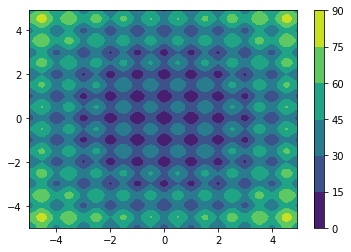

In [8]:
plt.contourf(X,Y,Z); plt.colorbar();

In [9]:
k = 2
bounds = np.ones((k,2))*5; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [10]:
%run HXDY.ipynb

In [11]:
res = HXDY(fun=Rastringin, bounds=bounds, hess=Rastringin_hessian, jac=Rastringin_gradient, method='Newton-CG')

In [13]:
res = res['x']

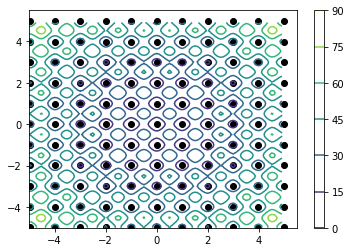

In [14]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

### Rastringin function - With args (no params)

In [ ]:
A = 10
d = 2
def Rastringin(x, origin):
    x = x - origin
    return (A*d + np.dot(x,x) - A*np.sum(np.cos(2.*np.pi*x)))

In [ ]:
def Rastringin_gradient(x, origin):
    x = x - origin
    grad = np.empty(len(x))
    for i in range(len(grad)):
        grad[i] = (2.*x[i] + A*np.sin(2.*np.pi*x[i])*2.*np.pi)
    return grad

In [ ]:
def Rastringin_hessian(x, origin):
    x = x - origin
    hess = np.zeros((len(x),len(x)))
    for i in range(len(hess)):
        hess[i,i] = (2 + A*np.cos(2.*np.pi*x[i])*(4.*np.pi*np.pi))
    return hess

In [ ]:
X = np.arange(0,10,1e-1)
Y = np.arange(0,10,1e-1)

In [ ]:
Z = np.empty((len(X),len(Y)))

In [ ]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = Rastringin(np.array([X[i],Y[j]]), 5*np.ones(2))

### Notice that the center is shifted

In [ ]:
plt.contourf(X,Y,Z); plt.colorbar();

In [ ]:
k = 2
bounds = np.ones((k,2))*10; bounds[:,0] = 0;
bounds

### Notice this little switcheroo, where I put in the origin that I want

In [ ]:
from functools import partial

In [ ]:
o = 5*np.ones(2)
NewRastringin = partial(Rastringin, origin = o)
NewRastringin_gradient = partial(Rastringin_gradient, origin = o)
NewRastringin_hessian = partial(Rastringin_hessian, origin = o)

In [ ]:
res = HXDY(fun=NewRastringin, bounds=bounds, hess=NewRastringin_hessian, jac=NewRastringin_gradient)

In [ ]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

### And you can see that the modified function works too!

### Rastringin function - With args and custom params

Notice that the rastringin function is staying the same as the last time

In [ ]:
p = defaultParams()

In [ ]:
#p is of this type:
np.dtype([('numWorkers','i2'),
                            ('epsilon','f8'),
                            ('radius_squared','f8'),
                            ('maxCount','i4'),
                            ('alpha','f8'),
                            ('unfairness','f8'),
                            ('wildness','f8'),
                            ('minImprovement','f8'),
                            ('N','i4'),
                            ('keepLastX','i2'),
                            ('maxRuns','i4'),
                            ('returnedThreshold','f8'),
                            ('verbose','b'),
                            ('k','i4'),
                            ('numGenerations','i4'),
                          ]);

In [ ]:
p.epsilon

In [ ]:
p.N

In [ ]:
p.N = 3

In [ ]:
res = HXDY(fun=NewRastringin, bounds=bounds, hess=NewRastringin_hessian, jac=NewRastringin_gradient, parameters=p)

In [ ]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

### And you can see that when I used N=3 it was able to explore far less

### Schwefel Function

In [ ]:
def Schwefel(x):
    total = 0
    for i in range(len(x)):
        if np.abs(x[i]) <= 500:
            total += -x[i]*np.sin(np.sqrt(np.abs(x[i])))
        else:
            total += .02*x[i]*x[i]
    return -(-418.9829*(len(x)+1) - total)

In [ ]:
def Schwefel_gradient(X):
    y = np.empty(len(X))

    Sin = np.sin
    Abs = np.abs
    Cos = np.cos
    Sqrt = np.sqrt

    for i in range(len(X)):
        x = X[i]

        if x<0:
            slope = -1.
        else:
            slope = 1.

        y[i] = -Sin(Sqrt(Abs(x))) - x*Cos(Sqrt(Abs(x)))*slope/(2.*Sqrt(Abs(x)))
    return -y

In [ ]:
def Schwefel_hessian(x):
    Sin = np.sin
    Abs = np.abs
    Cos = np.cos
    Sqrt = np.sqrt
        
    hess = np.zeros((len(x), len(x)))
    
    for i in range(len(x)):
        xi = x[i]
        if xi<0:
            slope = -1.
        else:
            slope = 1.

        factor = 1./(4.*Abs(xi)**1.5)
        term1 = xi*Sqrt(Abs(xi))*Sin(Sqrt(Abs(xi)))
        term2 = Cos(Sqrt(Abs(xi)))*(xi-2.*Abs(xi)*(2.*slope))
        hess[i,i] = factor*(term1+term2)
    return - hess

In [ ]:
X = np.arange(-500,500,1e0)
Y = np.arange(-500,500,1e0)

In [ ]:
Z = np.empty((len(X),len(Y)))

In [ ]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = Schwefel(np.array([X[i],Y[j]]))

In [ ]:
plt.contourf(X,Y,Z); plt.colorbar();

In [ ]:
k = 2
bounds = np.ones((k,2))*500; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [ ]:
res = HXDY(fun=Schwefel, bounds=bounds, args=(), jac=Schwefel_gradient, tol=1e-4, 
                                  hess=Schwefel_hessian, epsilon=1e-8, maxCount=20, alpha=1., 
                                  unfairness=5, N=100, keepLastX = 3, numWorkers=-1, method='L-BFGS-B',
          extraStoppingCriterion=lambda res: True if len(res)>30 else False); 

In [ ]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

In [ ]:
k = 4
bounds = np.ones((k,2))*500; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [ ]:
%run HXDY.ipynb

This call is taking a long time

In [ ]:
res = HXDY(fun=Schwefel, bounds=bounds, jac=Schwefel_gradient, hess=Schwefel_hessian); 

In [ ]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

In [ ]:
res[:7].round(4)

### Rosen function

In [ ]:
from scipy.optimize import rosen, rosen_der, rosen_hess

In [ ]:
X = np.arange(-2.5, 2.5, 1e-2)
Y = np.arange(-2.5, 2.5, 1e-2)

In [ ]:
Z = np.empty((len(X),len(Y)))

In [ ]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = rosen(np.array([X[i],Y[j]]))

In [ ]:
plt.contourf(X,Y,Z); plt.colorbar();

In [ ]:
k = 2
bounds = np.ones((k,2))*3; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [ ]:
res = HXDY(fun=rosen, bounds=bounds, args=(), jac=rosen_der, tol=1e-8, 
                                  hess=rosen_hess, epsilon=1e-8, maxCount=50, alpha=.1, cauchy_wildness=50,
                                  unfairness=2, N=100, keepLastX = 10, numWorkers=-1, method='Newton-CG'); 

In [ ]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

In [ ]:
res

In [ ]:
def f(x,scale=1., sub=0):
    return np.sum(x)*scale-sub

In [ ]:
def wrapper(x0, fun, *args, **kwargs):
    return fun(x0, *args, **kwargs)

In [ ]:
wrapper(np.ones(2), f, *(2, 1))